## Introducing spatial datasets

`conda create -n spat_data -c conda-forge r-base r-irkernel jupyter r-sp r-maps`

#### Points - Weather Station Measurements

In [18]:
dat <- read.csv("../../../../usecases_data/us_hist_climat_network/data/spatial_data/201901.csv")
dat[dat== -9999] <- NA

In [19]:
# prcp = precipitation
# tmin = daily minimum temperature
# tmax = daily maximum temperature (/100 to get to celsius)

head(dat)

,id,month,prcp_dmflag,prcp_dsflag,prcp_qcflag,prcp_value,year,tmin_dmflag,tmin_dsflag,tmin_qcflag,tmin_value,tmax_dmflag,tmax_dsflag,tmax_qcflag,tmax_value,elevation,latitude,longitude,state,utc_offset
,<chr>,<int>,<chr>,<lgl>,<lgl>,<dbl>,<int>,<chr>,<lgl>,<lgl>,<dbl>,<chr>,<lgl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
1,USH00031596,1,,NA,NA,1041,2019,,NA,NA,-138,,NA,NA,865,96.0,35.0842,-92.4289,AR,6
2,USH00410639,1,,NA,NA,449,2019,,NA,NA,552,,NA,NA,1766,77.7,28.4575,-97.7061,TX,6
3,USH00103732,1,,NA,NA,206,2019,,NA,NA,-1206,a,NA,NA,-54,691.6,42.5872,-111.7275,ID,7
4,USH00051564,1,b,NA,NA,64,2019,,NA,NA,-662,,NA,NA,683,295.4,38.8236,-102.3486,CO,7
5,USH00231711,1,e,NA,NA,219,2019,,NA,NA,-556,,NA,NA,400,234.7,38.3950,-93.7711,MO,6
6,USH00454769,1,,NA,NA,735,2019,,NA,NA,183,,NA,NA,984,3.7,46.1506,-122.9164,WA,8


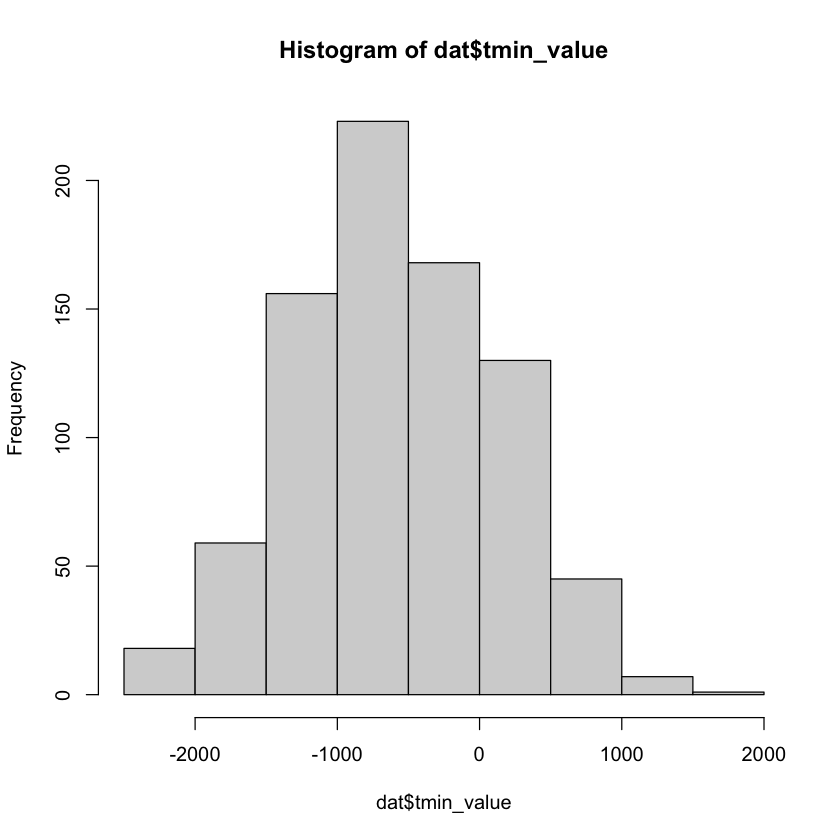

In [20]:
hist(dat$tmin_value)

In [30]:
library(sp)
library(RColorBrewer)

rgdal: version: 1.4-8, (SVN revision 845)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 3.0.4, released 2020/01/28
 Path to GDAL shared files: 
 GDAL binary built with GEOS: TRUE 
 Loaded PROJ.4 runtime: Rel. 6.3.1, February 10th, 2020, [PJ_VERSION: 631]
 Path to PROJ.4 shared files: /Users/wayne.lee/miniconda3/envs/spat_data/share/proj
 Linking to sp version: 1.4-1 



In [23]:
timestamps <- "2020-08-01"

In [28]:
strftime(timestamps, "%y-%m-%d")

[1] "20-08-01"

In [22]:
df <- SpatialPointsDataFrame(coords = dat[, c("longitude", "latitude")],
                             data = dat["tmin_value"] / 100,
                             proj4string=CRS("+proj=longlat +datum=WGS84"))

In [32]:
range(df$tmin_value, na.rm = TRUE)

[1] -23.84  19.07

In [7]:
k <- 5
deg_cats <- cut(df$tmin_value,
                breaks=seq(min(df$tmin_value, na.rm=TRUE),
                           max(df$tmin_value, na.rm=TRUE),
                           length.out=k+1))
cols <- brewer.pal(k, "YlOrRd")

In [34]:
class(df)

[1] "SpatialPointsDataFrame"
attr(,"package")
[1] "sp"

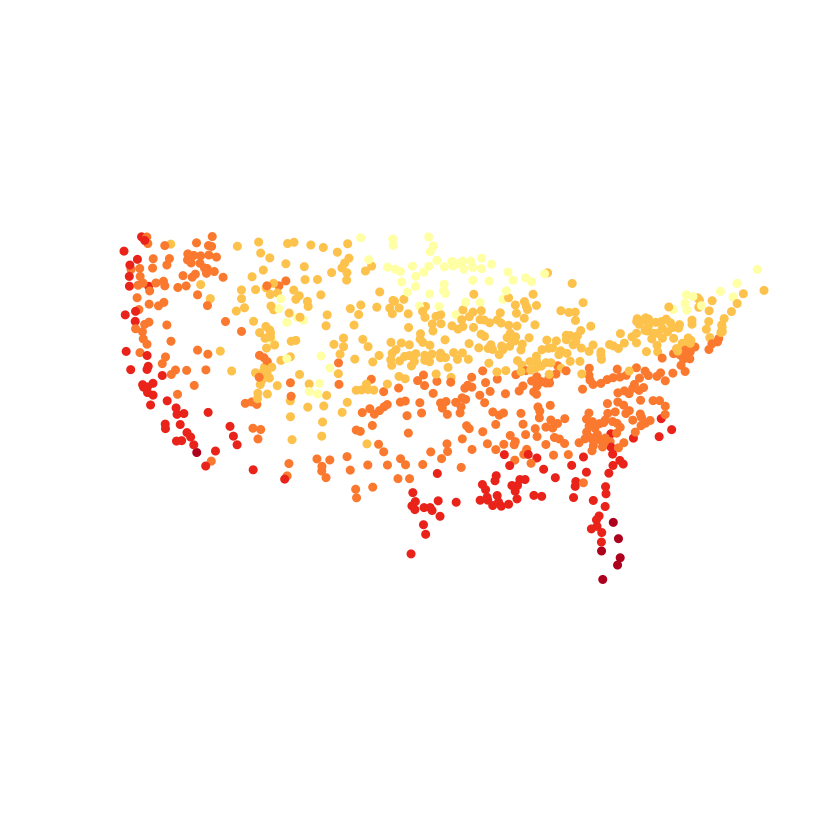

In [33]:
plot(df, pch=16, col=cols[deg_cats])

A quick look at UTM zones in the US is here:
https://www.nceas.ucsb.edu/sites/default/files/2020-04/OverviewCoordinateReferenceSystems.pdf

In [35]:
utm14 <- spTransform(df, CRSobj = "+proj=utm +zone=14 +datum=WGS84")
utm10 <- spTransform(df, CRSobj = "+proj=utm +zone=10 +datum=WGS84")

#### Look at the impact of projections

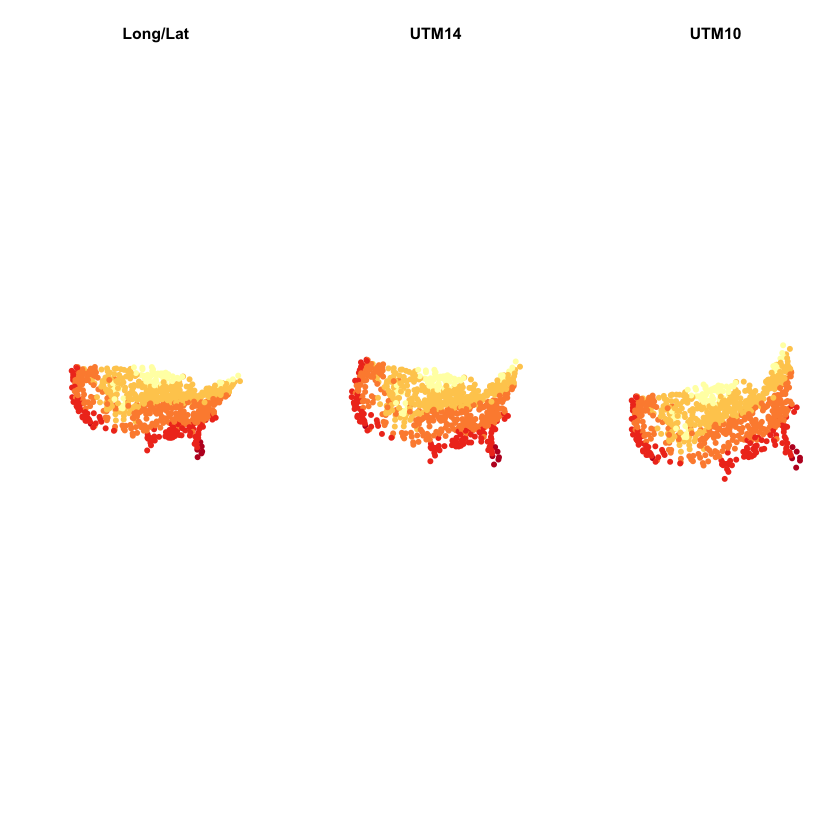

In [37]:
par(mfrow=c(1, 3))
plot(df, pch=16, col=cols[deg_cats], main="Long/Lat")
plot(utm14, pch=16, col=cols[deg_cats], main="UTM14")
plot(utm10, pch=16, col=cols[deg_cats], main="UTM10")

#### Calculating distances between stations

In [38]:
dist_mat <- sp::spDists(df)

In [39]:
dim(dist_mat)

[1] 888 888

In [40]:
dist_mat[1:5, 1:5]

0.0000,888.3504,1865.2498,975.3642,386.4596
888.3504,0.0000,2012.8759,1227.3094,1161.0305
1865.2498,2012.8759,0.0000,895.2998,1588.3471
975.3642,1227.3094,895.2998,0.0000,748.3436
386.4596,1161.0305,1588.3471,748.3436,0.0000


In [41]:
head(df)

ERROR while rich displaying an object: Error in loadNamespace(name): there is no package called ‘geojsonio’

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_geojson.Spat

           coordinates tmin_value
1  (-92.4289, 35.0842)      -1.38
2  (-97.7061, 28.4575)       5.52
3 (-111.7275, 42.5872)     -12.06
4 (-102.3486, 38.8236)      -6.62
5   (-93.7711, 38.395)      -5.56
6 (-122.9164, 46.1506)       1.83

#### Find one example that shows that closer locations have more similar temperature values

### Question: What if we didn't have the state information in the original data frame?

Can we use the longitude/latitude along with state border information to derive which measurements came from which state?

In [11]:
# Get state border polygon
library(maps)

In [12]:
# Construct the polygon from scratch
state <- "oregon"
coords <- map('state', regions = state, plot=FALSE, fill=TRUE)
# Code below seems complex but its nested structure allows multiple polygons to be grouped as one polygon object
# Warning: the code below assumes one continuguous polygon
state_poly <- Polygon(cbind(coords$x, coords$y),
                      hole=FALSE)
state_polys <- Polygons(list(state_poly), state)
state_sp <- SpatialPolygons(list(state_polys), proj4string=CRS("+proj=longlat +datum=WGS84"))

In [13]:
coords$name

[1] "oregon"

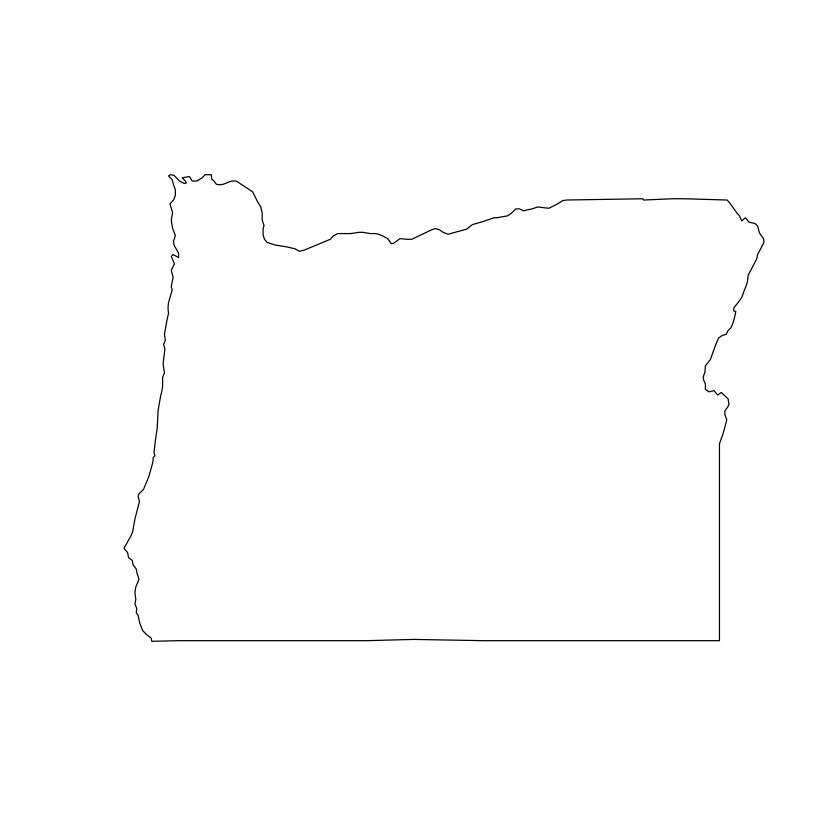

In [14]:
plot(state_sp)

In [15]:
points_over_poly <- sp::over(df, state_sp)
within <- !is.na(points_over_poly)

In [16]:
true_state_label <- as.factor(dat$state)

In [17]:
table(true_state_label, within)

                within
true_state_label FALSE TRUE
              AL    11    0
              AR    13    0
              AZ    10    0
              CA    43    0
              CO    21    0
              CT     3    0
              DE     1    0
              FL    17    0
              GA    15    0
              IA    23    0
              ID    26    0
              IL    28    0
              IN    26    0
              KS    27    0
              KY     7    0
              LA    12    0
              MA     6    0
              MD     6    0
              ME     7    0
              MI    20    0
              MN    26    0
              MO    19    0
              MS    21    0
              MT    32    0
              NC    26    0
              ND    17    0
              NE    33    0
              NH     4    0
              NJ     9    0
              NM    17    0
              NV     9    0
              NY    42    0
              OH    18    0
              OK    21   

#### Please modify the code such that it will work for New York

- Hint: it may be easier to tackle each "region" separately, you can get the regions in new york:

  `map("state", regions= "new york", fill=TRUE, plot=FALSE)$names`
- Hint: you might want to run the complicated code line by line first!